In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
dataset=pd.read_csv('FuelConsumption.csv')

In [3]:
dataset.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
df=dataset[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]

<function matplotlib.pyplot.show(*args, **kw)>

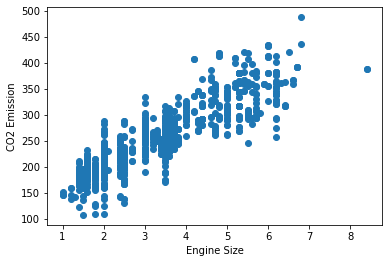

In [6]:
plt.scatter(dataset.ENGINESIZE,dataset.CO2EMISSIONS)
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

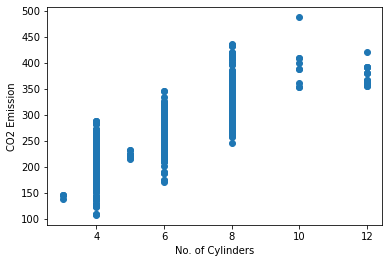

In [7]:
plt.scatter(dataset.CYLINDERS,dataset.CO2EMISSIONS)
plt.xlabel("No. of Cylinders")
plt.ylabel("CO2 Emission")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

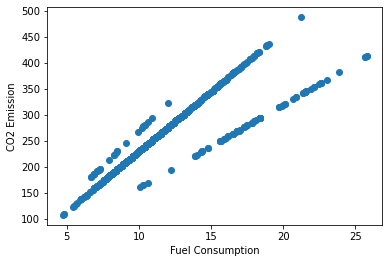

In [8]:
plt.scatter(dataset.FUELCONSUMPTION_COMB,dataset.CO2EMISSIONS)
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2 Emission")
plt.show

In [9]:
TRAIN_SIZE = 0.80
# Create boolean mask
# np.random creates a vector of random values between 0 and 1
# Those values are filtered to create a binary mask
msk = np.random.rand(len(dataset)) < TRAIN_SIZE

train = dataset[msk]  
test = dataset[~msk]

In [10]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)
print("Coefficient:", regr.coef_)
print("Intercept:", regr.intercept_)

Coefficient: [[38.73096153]]
Intercept: [126.61116102]


In [12]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [15]:
predicted_emissions = regr.predict(test_x)
predicted_emissions

array([[184.70760331],
       [262.16952637],
       [219.56546869],
       [308.64668021],
       [204.07308408],
       [204.07308408],
       [242.80404561],
       [281.53500714],
       [204.07308408],
       [204.07308408],
       [242.80404561],
       [289.28119944],
       [242.80404561],
       [204.07308408],
       [358.9969302 ],
       [358.9969302 ],
       [204.07308408],
       [204.07308408],
       [297.02739175],
       [242.80404561],
       [297.02739175],
       [242.80404561],
       [297.02739175],
       [180.83450716],
       [219.56546869],
       [204.07308408],
       [366.7431225 ],
       [366.7431225 ],
       [180.83450716],
       [331.88525713],
       [331.88525713],
       [312.51977636],
       [219.56546869],
       [219.56546869],
       [293.1542956 ],
       [293.1542956 ],
       [331.88525713],
       [180.83450716],
       [196.32689177],
       [180.83450716],
       [266.04262252],
       [219.56546869],
       [266.04262252],
       [266

In [17]:
np.mean((predicted_emissions-test_y)**2)


938.4862434384701

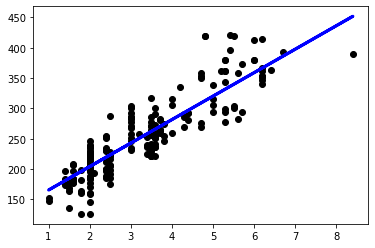

In [18]:
plt.scatter(test_x,test_y, color='black')
plt.plot(test_x,predicted_emissions,color='blue', linewidth=3)
plt.show()